# MBA em Ciência de Dados
## Técnicas Avançadas de Captura e Tratamento de Dados


### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>


## <span style="color:darkred">Codificação de Variáveis Categóricas</span>

Material Produzido por Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

## Variáveis categóricas

Variáveis categóricas, geralmente expressas por meio de texto, não são utilizáveis diretamente por parte dos modelos estatísticos e computacionais.

Obter codificações numéricas dessas variáveis se torna importante para permitir análise por um número mais amplo de ferramentas


In [1]:
# carregando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# carregando dados
data_orig = pd.read_csv("./dados/municipios_mba.csv")
data_orig.head()

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa


Vamos estudar a variável `urbaniz`, juntamente com `IDH` e `pop_sanea` apenas para visualizar

In [3]:
data = data_orig.copy()

# definindo variáveis
attrs = ['urbaniz', 'IDH', 'pop_sanea']

for var in attrs:
    print(var, '-', data[var].dtype)

# eliminando valores nulos
data = data.dropna(subset=attrs)
data

urbaniz - object
IDH - int64
pop_sanea - float64


,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,TOCANTINS,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,705,rural,muito baixa
5561,5545,TOCANTINS,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,694,rural,muito baixa
5562,5546,TOCANTINS,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,696,rural,muito baixa
5563,5141,TOCANTINS,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,692,rural,muito baixa


vamos verificar a distribuição dos dados que temos:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18fbe927f0>,
      dtype=object)

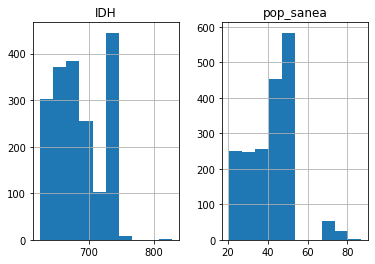

In [4]:
data[attrs].hist()

A variável do tipo "objeto" é categórica para fins semânticos.

Por isso é preciso agregar `urbaniz` para plotar o histograma.

OBS: em pandas há um tipo "category" que funciona diferente, veremos abaixo.


array(['rural', 'baixo', 'médio', 'muito alto', 'alto'], dtype=object)

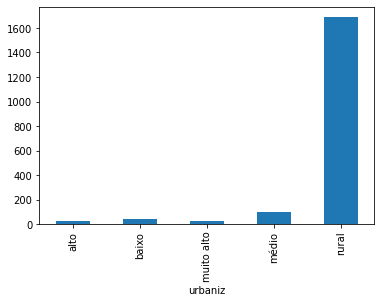

In [5]:
data.groupby('urbaniz').size().plot(kind='bar')
data['urbaniz'].unique()

Há várias possibilidades para mapear valores categóricos em numéricos. 

#### Categóricos nominais

Casos em que não há relação de ordenação entre os elementos, podemos usar código ordenado de forma alfabética.

Nulos são representados por -1

**1. usando código associado ao tipo category (pandas)**


In [6]:
data['urban_cod'] = data['urbaniz'].astype("category").cat.codes
data

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana,urban_cod
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa,4
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa,4
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média,1
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa,4
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,TOCANTINS,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,705,rural,muito baixa,4
5561,5545,TOCANTINS,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,694,rural,muito baixa,4
5562,5546,TOCANTINS,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,696,rural,muito baixa,4
5563,5141,TOCANTINS,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,692,rural,muito baixa,4


Uma desvantagem é que usamos um critério numérico arbitrário (ordem alfabética), mas pode ser que não faça sentido dizer que a diferença entre os valores faça sentido.

Exemplo, a diferença entre: "rural" e "média" é 1

O que isso significa?

**2. usando map() por meio de dicionário**

Outra opção, mais genérica, é utilizar um mapa.

Abaixo vamos usar de 0 até 4, sendo 0 = rural e 4 = muito alto

In [7]:
cat_urban = data['urbaniz'].unique()
num_urban = np.arange(data['urbaniz'].unique().shape[0])
print(cat_urban)
print(num_urban)

map_urban = dict(zip(cat_urban, num_urban))
print("\nDicionário:")
print(map_urban)

['rural' 'baixo' 'médio' 'muito alto' 'alto']
[0 1 2 3 4]

Dicionário:
{'rural': 0, 'baixo': 1, 'médio': 2, 'muito alto': 3, 'alto': 4}


A partir do dicionário podemos criar um mapa entre os valores existentes e novos valores, agora numéricos.

Essa opção é uma das mais rápidas.

In [11]:
data['urban_map'] = data['urbaniz'].map(map_urban)
data

,gid,UF,nome,Censo,PIB,pop,classe,desemprego,pop_sanea,expec_vida,pobreza,IDH,urbaniz,dens_pop_urbana,urban_cod,urban_ord,urban_map
0,752,ACRE,Acrelândia,2010.0,151120.015625,12241,2,5.2,33.532382,73.6,19.2,660,rural,muito baixa,4,rural,0
1,747,ACRE,Assis Brasil,2010.0,48347.300781,5662,1,5.0,32.252163,74.2,18.9,664,rural,muito baixa,4,rural,0
2,748,ACRE,Brasiléia,2010.0,194979.828125,20238,1,3.0,31.663354,75.3,19.5,667,baixo,média,1,baixo,1
3,754,ACRE,Bujari,2010.0,88708.031250,6772,2,4.8,33.501357,73.4,19.1,659,rural,muito baixa,4,rural,0
4,751,ACRE,Capixaba,2010.0,89052.679688,9287,1,4.4,33.431383,75.4,18.1,661,rural,muito baixa,4,rural,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,1011,TOCANTINS,Tocantinópolis,2010.0,124657.000000,21826,1,6.5,28.405306,75.0,12.6,705,rural,muito baixa,4,rural,0
5561,5545,TOCANTINS,Tupirama,2010.0,34883.894531,1474,3,4.6,29.447854,74.8,12.9,694,rural,muito baixa,4,rural,0
5562,5546,TOCANTINS,Tupiratins,2010.0,30757.437500,2143,2,7.0,27.172728,74.2,12.6,696,rural,muito baixa,4,rural,0
5563,5141,TOCANTINS,Wanderlândia,2010.0,66966.773438,9493,1,5.4,27.762133,74.4,12.7,692,rural,muito baixa,4,rural,0


Note que, mesmo ordenado, as diferenças podem não fazer tanto sentido.

Nesse caso a diferença entre "rural" e "média" é 2

#### Categóricos ordinais

Para cenários em que as categorias podem ser ordenadas, como notas, faixas salariais, escalas, podemos usar ordenação categórica:

In [12]:
cat_ord_urban = ['rural', 'baixo', 'médio', 'alto', 'muito alto']
print(cat_ord_urban)

urban_ord_type = pd.api.types.CategoricalDtype(categories=cat_ord_urban, ordered=True)
data['urban_ord'] = data['urbaniz'].astype(urban_ord_type)

['rural', 'baixo', 'médio', 'alto', 'muito alto']


In [13]:
urban_atts = ['urbaniz', 'urban_cod', 'urban_map', 'urban_ord']
for var in urban_atts:
    print(var, '-', data[var].dtype)

data['urban_ord']

urbaniz - object
urban_cod - int8
urban_map - int64
urban_ord - category


0       rural
1       rural
2       baixo
3       rural
4       rural
        ...  
5560    rural
5561    rural
5562    rural
5563    rural
5564    rural
Name: urban_ord, Length: 1870, dtype: category
Categories (5, object): [rural < baixo < médio < alto < muito alto]

In [14]:
data.loc[:13, urban_atts]

,urbaniz,urban_cod,urban_map,urban_ord
0,rural,4,0,rural
1,rural,4,0,rural
2,baixo,1,1,baixo
3,rural,4,0,rural
4,rural,4,0,rural
5,médio,3,2,médio
6,rural,4,0,rural
7,baixo,1,1,baixo
8,rural,4,0,rural
9,baixo,1,1,baixo


*Aqui, temos a ordenação codificada nos metadados, mas não há operadores!*

In [24]:
# subtracao "medio" - "rural"
#data.loc[5, 'urban_ord']  - data.loc[0, 'urban_ord']

# comparacao "medio" > "rural"
#if (data.loc[5, 'urban_ord'] > data.loc[0, 'urban_ord']):
#    print("médio > rural")

### Codificação *one-hot* ou *dummy variables*

Transforma cada possível categoria em uma variável binária indicando presença ou não de um valor.

Em pandas é possível usar a função `get_dummies()`

In [25]:
dummy_vars = pd.get_dummies(data['urbaniz'])

data = pd.concat([data, dummy_vars], axis=1, sort=False)

atts_dummy = ['urbaniz'] + list(cat_urban)
print(atts_dummy)

data.loc[:13 , atts_dummy]

['urbaniz', 'rural', 'baixo', 'médio', 'muito alto', 'alto']


,urbaniz,rural,baixo,médio,muito alto,alto
0,rural,1,0,0,0,0
1,rural,1,0,0,0,0
2,baixo,0,1,0,0,0
3,rural,1,0,0,0,0
4,rural,1,0,0,0,0
5,médio,0,0,1,0,0
6,rural,1,0,0,0,0
7,baixo,0,1,0,0,0
8,rural,1,0,0,0,0
9,baixo,0,1,0,0,0


### Resumo:

* Pode ser preciso codificar variáveis categóricas em diferentes formatos 


* Considerar a natureza dos dados e sua aplicação para definir o tipo destino:
    * categórico ordinal
    * codificação nominal
    * codificação ordinal
    * one-hot / dummy variables
